## Importing Fastai Package

In [ ]:
import fastai
from fastai.vision.all import *

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 5.8MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


## Checking out Fastai Package

In [ ]:
fastai.__version__

'2.1.5'

## Reading in our csv files containing the filenames and Labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/IP Dataset/Train.csv")

test = pd.read_csv("/content/drive/MyDrive/IP Dataset/Test.csv")



##I created another column to give me just the filenames with the "train/"
train["new_filenames"] = [(str(i) + ".png") for i in train["ID"]]

test["new_filenames"] = [(str(i) + ".png") for i in test["ID"]]



## Image Data Loading
### Use the ImageDataLoader function in Fastai to load our image files, using the filenames gotten from our train dataframe
### More info on the ImageDataLoader function: https://docs.fast.ai/tutorial.vision.html

In [ ]:
dls = ImageDataLoaders.from_df(train, path="/content/drive/MyDrive/IP Dataset/train",

                               fn_col='new_filenames', ## Columns in dataframe containing filenames
                               label_col = 'LABEL', ## Column in dataframe containing label

                               item_tfms=Resize(460), ## Resizing 
                               seed = 42, ## Enable same set of validation images
                               batch_tfms=aug_transforms(size=224), ## Augmentation
                               valid_pct = 0.2)

## Note the path "../combined_images - Copy" to ease in dataloading with FASTAI I combined all the image files(train and test) into a single folder
## To select just the training set images, i just pass in the train dataframe containing file names for only the training images


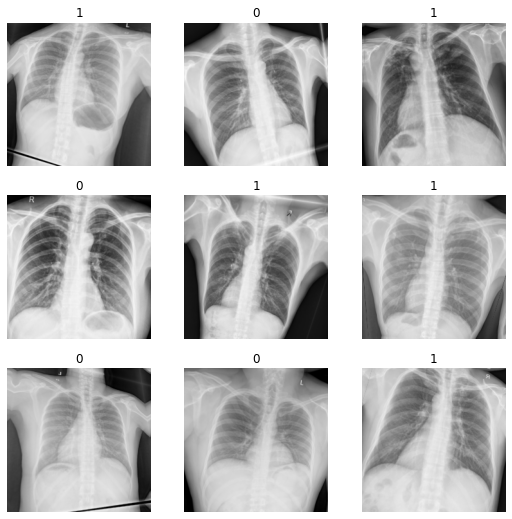

In [ ]:
## Give a preview of the images loaded
dls.show_batch()

## Defining our Model

In [ ]:
learn = cnn_learner(dls, resnet50, 
                    metrics=accuracy, 
                    model_dir='/kaggle/working/models')

# resnet34, resnet50, resnet101, resnet152
# densenet121, densenet169, densenet201, densenet161


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


## Using Fastai "lr_find" method to get Optimal Learning Rate suggestions for our model

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=6.309573450380412e-07)

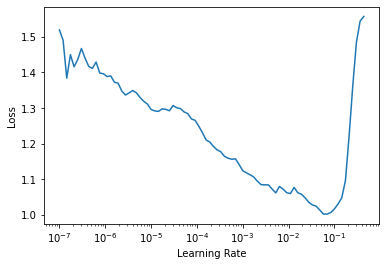

In [ ]:
learn.lr_find()

## Model Training

In [ ]:
# slice(1e-6, 1e-4)
learn.fine_tune(10, 0.00691830)

epoch,train_loss,valid_loss,accuracy,time
0,1.141300,1.554872,0.657343,09:27


epoch,train_loss,valid_loss,accuracy,time
0,1.051582,1.774993,0.622378,09:16
1,0.844667,1.241290,0.720280,09:11
2,0.787636,0.919145,0.734266,09:15
3,0.697974,0.617157,0.853147,09:42
4,0.603413,0.631570,0.846154,09:35
5,0.528568,0.454110,0.867133,09:39
6,0.476567,0.460767,0.867133,09:40
7,0.418272,0.527486,0.860140,09:35
8,0.369383,0.485811,0.846154,09:43
9,0.325749,0.460116,0.839161,10:05


In [ ]:
learn_2 = cnn_learner(dls, resnet152, 
                    metrics=accuracy, 
                    model_dir='/kaggle/working/models')

# resnet34, resnet50, resnet101, resnet152
# densenet121, densenet169, densenet201, densenet161


In [ ]:
learn_2.lr_find()

In [ ]:
learn_3 = cnn_learner(dls, densenet201, 
                    metrics=accuracy, 
                    model_dir='/kaggle/working/models')

# resnet34, resnet50, resnet101, resnet152
# densenet121, densenet169, densenet201, densenet161


In [ ]:
learn_3.lr_find()

## Give a preview of random images and their true and predicted classes

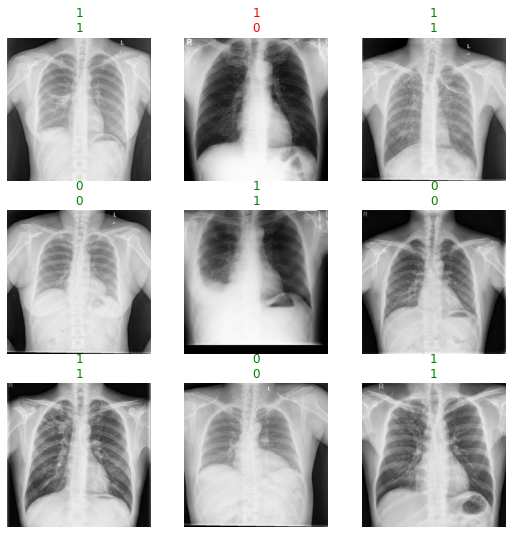

In [ ]:
learn.show_results()

## Predicting on the test images

In [ ]:
## All we need to do here is pass in the dataframe that contains the test image files "test"
test_dl=learn.dls.test_dl(test)

## We used "tta()" test-time-augmentation to predict, we can alternatively use "get_preds()" but "tta()" performs better
preds, _ = learn.tta(dl=test_dl)

In [ ]:
preds.numpy()[:10]

## Creating our Submission File

In [ ]:
ss = pd.read_csv('/kaggle/input/tuberculosis-xray/SampleSubmission.csv')
ss['LABEL'] = preds.numpy()[:, 1]
filename = "fastai_resnet50_10epochs.csv"
ss.to_csv("/kaggle/working/"+filename, index = False)